# Odtworzenie środowiska z poprzednich zajęć



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import LambdaCallback

np.set_printoptions(suppress=True)
print(tf.__version__)

2.11.0


In [ ]:
rng = np.random.default_rng(2023)

In [ ]:
data = pd.DataFrame(
    data=np.hstack((
        rng.normal(100, 10, size=(100, 1)),
        rng.normal(50, 5, size=(100, 1)),
        rng.normal(200, 20, size=(100, 1)),
        rng.normal(0, 5, size=(100, 1))
    )),
    columns=["X1", "X2", "X3", "e"]
)

data["Y"] = 150 - 4*data.X1 + 2.5*data.X2 + data.e

In [ ]:
random_tensor = tf.random.normal((3,), seed=2023)
random_tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.3747068 ,  0.72808206, -0.7266839 ], dtype=float32)>

Przypomnij sobie schemat prostej sieci neuronowej, implementującej regresją.

![scheme](https://www.kamilkmita.com/zmum/lab-01-nn-scheme.png)

W powyższym modelu:
* $x$ to wektor kolumnowy `[[X1], [X2], [X3]]` (czyli macierz `np.array` o wymiarze 3x1),
* $W$ = `[[w1, w2, w3]]` to macierz o wymiarze 1x3,
* $b \in R$,
* $z=Wx + b$ to warstwa typu `tf.keras.layers.Dense`,
* funkcja aktywacji $\sigma = Id$, co zapewnia nam model liniowy.

Zauważmy, że w żargonie NN mówimy o "wagach" $w_j$, a nie współczynnikach $\beta_j$, zaś wyraz wolny $w_0$ to "bias" a nie "intercept".

In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(3,)))

model2.add(
    tf.keras.layers.Dense(
        1, 
        activation=tf.keras.activations.linear,
        kernel_initializer=tf.keras.initializers.Constant(random_tensor)
    )
)

In [ ]:
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model2.layers[0].get_weights()))

In [ ]:
model2.compile(optimizer='sgd', loss='mse')

In [ ]:
history = model2.fit(
    data.loc[:, ["X1", "X2", "X3"]], 
    data.loc[:, ["Y"]], 
    epochs=5, 
    verbose=1, 
    callbacks = [print_weights], 
    batch_size=20, 
    shuffle=False
)

# Co się stało podczas procesu uczenia sieci?

[Problem ekspoludjącego gradientu](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

# algorytm Stochastic Gradient Descent - skrótowo

(dla pojedynczego *batch'a*)

1. zainicjuj wagi $W_0$,
2. oblicz ryzyko $L(W_0)$ na *batch'u*,
3. oblicz `grad` = $\nabla_W L(W_0)$ na *batch'u* (zastosuj operację uśredniania jeżeli \#batch > 1),
4. $W_1 = W_0 - \eta \cdot$ `grad`,
5. weź kolejny batch i wróć do kroku 2.

## Uwagi a propos konwencji

* W naszym prostym przypadku $W = (w_0, w_1, w_2, w_3)$ jest wektorem, ale częściej $W$ jest macierzą. To jedynie komplikuje obliczenia (chcemy wyrazić gradient funkcji straty względem $W$ także jako macierz), ale nie zmienia algorytmu SGD.


# Algorytm SGD krok po kroku.

# Krok 1. Zainicjuj $W_0$ (Zadanie 1)

Stwórz `model3`, używając `kernel_initializer=tf.keras.initializers.Constant(random_tensor)`, skompiluj model i wypisz wagi do konsoli.

In [ ]:
model3 = ...

model3.add(...)

model3.add(...)

weights = ...

In [ ]:
model3.compile(...)

In [ ]:
...

# Krok 2. Policz *ręcznie* $L(W_0)$ z modelu na batchu 20 obserwacji. (Zadanie 2)

Użyj metody `model3.predict`.

Powinno wyjść w przybliżeniu $3959.83$.

# Kroki 3 & 4 (Zadanie 3)
3. Oblicz **grad** = $\nabla_W L(W_0)$.
4. Przypisz $W_1 = W_0 - \eta \cdot \:$ **grad**.

Przypomnijmy, że $\eta = 0.1$ w naszym przykładzie.

Użyjemy metody `model3.train_on_batch`, która dostarcza nam pełnej kontroli nad procesem trenowania sieci neuronowej w `Keras`.

In [ ]:
model3.train_on_batch(...)

Zauważ, że wywołanie `model3.train_on_batch()` zaktualizowało wagi zgodnie z algorytmem SGD. Model przechowuje w tej chwili wagi $W_1$. Wypisz te wagi do konsoli.

# Zadanie 4

Zaimplementuj kroki 3 oraz 4 używając jedynie pakietów `pandas` / `numpy`.

Wywołaj 1 batch update na pierwszych 20 obserwacjach ze zbioru `data`. Upewnij się, że rezultaty odpowiadają tym otrzymanym metodą `model3.train_on_batch` powyżej.

Dla przypomnienia: gradient funkcji straty $L(W) = MSE(W)$ w regresji liniowej:

\begin{equation}
\nabla_W L(W) = 
\nabla_W (X W - Y)^T (X W - Y) =
-2X^TY + 2X^TXW
\end{equation}

**Nie zapomnij o uwzględnieniu *bias* (wyrazu wolnego) w procesie optymalizacji!**

# Podpowiedzi (rozwiń sekcję, jeżeli chcesz skorzystać)    

1. napisz funkcję `gradient(X, Y, W)` która zwróci gradient,
2. przygotuj **macierze** X, Y, W_0 (zadbaj o reshaping),
    * macierz $X$ powinna zawierać kolumnę jedynkową (użyj np. `np.c_`),
    * W_0 powinno zawierać na pierwszym miejscu wagę bias (użyj np. `np.insert`)
3. Uśrednij gradient wynikający z funkcji `gradient` (czy powinieneś/aś użyć funkcji `np.mean`?),
4. Oblicz zaktualizowane wagi `W_1` i porównaj z wynikiem z `model3`.

# Miejsce na wykonanie Zadania 4

## Porównajmy uaktualnione wagi z wynikami `model3.train_on_batch`

# Zadanie 5

Powrót do problemu eksplodującego gradientu. Czy możemy jakoś przeciwdziałać temu problemowi?

Użyjmy innego algorytmu optymalizacji, np. ADAM (Adaptive Moment Estimation).

In [ ]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.Input(shape=(3,)))

model4.add(tf.keras.layers.Dense(
    1, 
    activation=tf.keras.activations.linear, 
    kernel_initializer=tf.keras.initializers.Constant(random_tensor)
))

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')

In [ ]:
history = model4.fit(data.loc[:, ["X1", "X2", "X3"]], data.loc[:, ["Y"]], epochs=1000, batch_size=25, verbose=0)

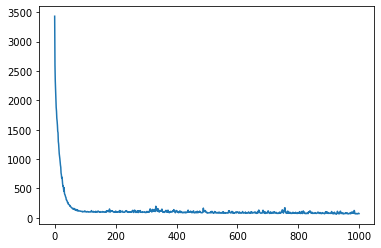

In [ ]:
plt.plot(history.epoch, history.history.get("loss"))

Jaka jest ostatnia wartości funkcji ryzyka w procesie treningowym?

In [ ]:
history.history.get("loss")[-1]

70.6379165649414

# Porównanie wyników sieci neuronowej oraz klasycznej metody najmniejszych kwadratów

Przypomnijmy sobie model matematyczny, który posłużył nam do symulacji danych.

* $\beta = (150, -4, 2.5, 0, 1)$,
* $X_1 \sim \mathcal{N}(100, 10)$,
* $X_2 \sim \mathcal{N}(50, 5)$,
* $X_3 \sim \mathcal{N}(200, 20)$,
* $\epsilon \sim \mathcal{N}(0, 5)$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(data.loc[:, ["X1", "X2", "X3"]].values, data.Y.values)

print(f"intercept: {lr.intercept_}\nX1: {lr.coef_[0]}\nX2: {lr.coef_[1]}\nX3: {lr.coef_[2]}")

Jaka jest wartość funkcji ryzyka w klasycznym modelu regresji liniowej?

In [ ]:
((lr.predict(data.loc[:, ["X1", "X2", "X3"]].values) - data.Y)**2).mean()

Porównaj MSE z sieci neuronowej oraz to z modelu liniowego.

In [ ]:
np.average(
    (
        model4.predict(data.loc[:, ["X1", "X2", "X3"]]) 
        - data.Y.values[:, np.newaxis]
     )**2
)

In [ ]:
np.average(
    (lr.predict(data.loc[:, ["X1", "X2", "X3"]].values) - data.Y.values)**2
)

# Możemy próbować innych ustawień

In [ ]:
model5 = tf.keras.Sequential()

model5.add(tf.keras.Input(shape=(3,)))

model5.add(tf.keras.layers.Dense(
    1, 
    activation=tf.keras.activations.linear, 
    kernel_initializer=tf.keras.initializers.Constant(random_tensor)
))

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.9), loss='mse')

In [ ]:
history = model5.fit(data.loc[:, ["X1", "X2", "X3"]], data.loc[:, ["Y"]], epochs=1000, batch_size=25, verbose=0)

In [ ]:
plt.plot(history.epoch, history.history.get("loss"))

In [ ]:
history.history.get("loss")[-1]